In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load._the._dataset
file_path='/content/sample-superstore-subset-excel.xlsx'

orders=pd.read_excel(file_path, sheet_name='Orders')

#Display._the.first.few.rows
print(orders.head())

print("Display_summary statistics")

#Display._summary._statistic__________


print(orders.describe())



   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Order Date  Ship Date  \
0  Centr

In [2]:

#Handle_.missing_.values__________________

orders['Product Base Margin'].fillna(orders['Product Base Margin'].mean(), inplace=True)


# Convert-data-types-if-necessary______________________________________
#-- Ensure --'Order Date' and 'Ship Date' are --datetime- types-________________________

orders['Order Date'] = pd.to_datetime(orders['Order Date'])




orders['Ship Date'] = pd.to_datetime(orders['Ship Date'])










#Create-any -new- columns --needed --for- analysis____________________________________




orders['Processing Time'] = (orders['Ship Date'] - orders['Order Date']).dt.days












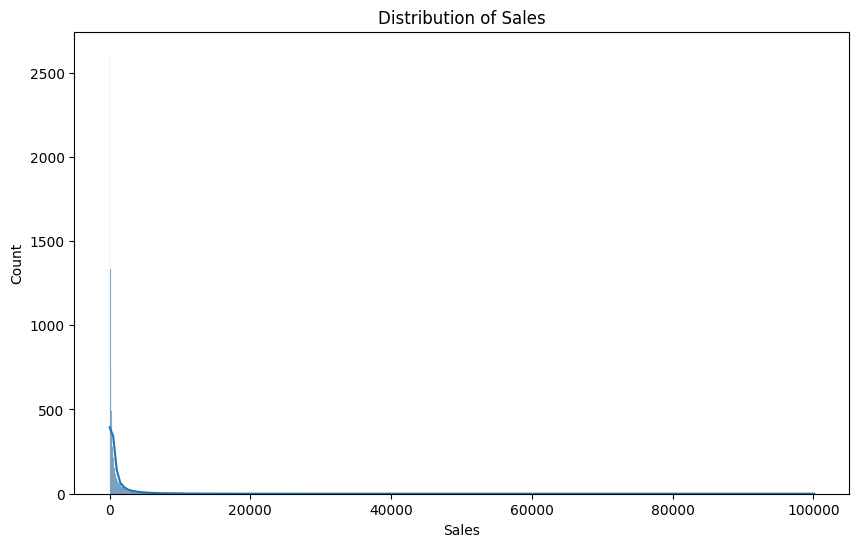

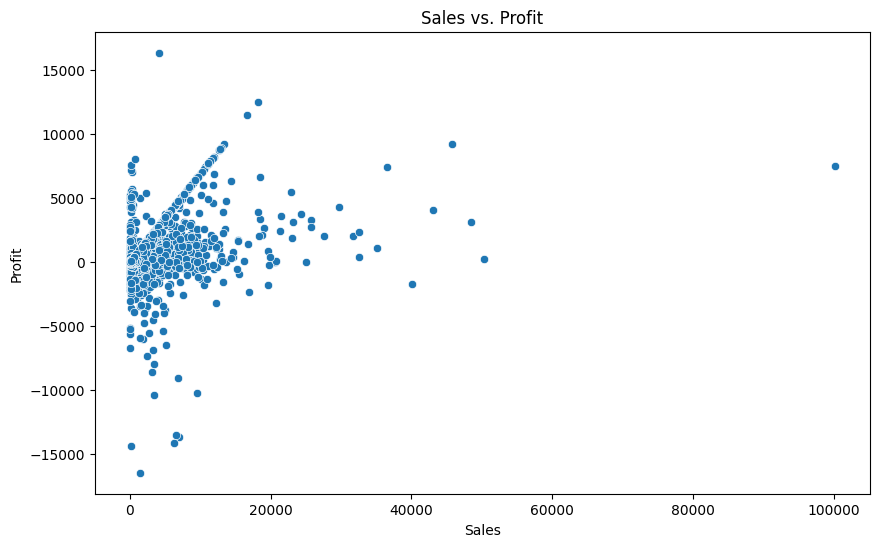

In [3]:

# Univariate- analysis-_____________________________
# Example: Distribution -of -Sales-___________________________
plt.figure(figsize=(10, 6))




sns.histplot(orders['Sales'], kde=True)

plt.title('Distribution of Sales')

plt.show()





# Bivariate -analysis_______________________________
# Example: Relationship between Sales and Profit________________________________
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Sales', y='Profit', data=orders)

plt.title('Sales vs. Profit')

plt.show()










In [4]:

# Summary- statistics -for -key- variables-____________________________________
print(orders.columns)

print(orders[['Sales', 'Profit', 'Quantity ordered new', 'Discount']].describe())






# Grouped -statistics-________________________________________
#Group -by-Product- Category -and -calculate-total- sales______________________________________________
print(orders.columns)

category_sales = orders.groupby('Product Category')['Sales'].sum()

print(category_sales)










Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Processing Time'],
      dtype='object')
               Sales        Profit  Quantity ordered new     Discount
count    9426.000000   9426.000000           9426.000000  9426.000000
mean      949.706272    139.236410             13.798430     0.049628
std      2598.019818    998.486483             15.107688     0.031798
min         1.320000 -16476.838000              1.000000     0.000000
25%        61.282500    -74.017375              5.000000     0.020000
50%       203.455000      2.567600             10.000000     0.050000
75%       776.402500    140.243850             17.


## Additional Statistical Analysis


In [5]:

from scipy.stats import ttest_ind, chi2_contingency


# Example: T-test for sales in different regions____________________________________
region1 = orders[orders['Region'] == 'East']['Sales']

region2 = orders[orders['Region'] == 'West']['Sales']


t_stat, p_val = ttest_ind(region1, region2)

print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")








# Chi-square- test for independence- between -Ship- Mode -and- Customer -Segment___________________________
contingency_table = pd.crosstab(orders['Ship Mode'], orders['Customer Segment'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test result: chi2-statistic = {chi2}, p-value = {p}")








T-test results: t-statistic = 0.12701745344062249, p-value = 0.8989321714456504
Chi-square test result: chi2-statistic = 1.6522944786735398, p-value = 0.9487444717191827


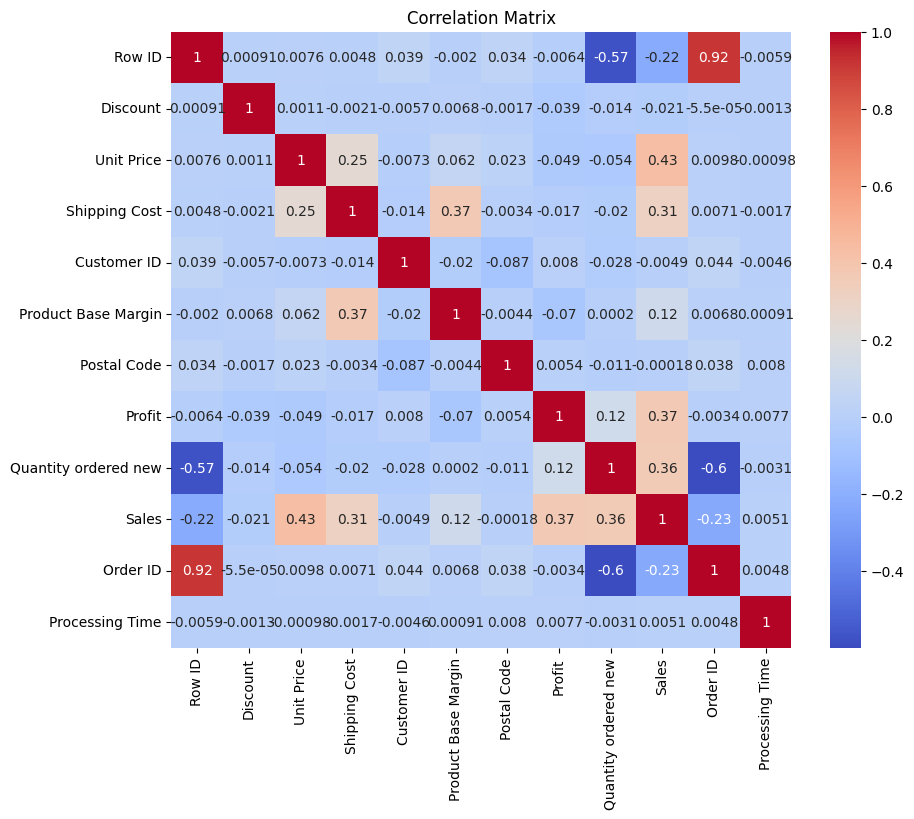

In [6]:
# Selecting -only- numeric- columns -for -correlation- matrix__________________________


numeric_cols = orders.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols.corr()


plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation Matrix')

plt.show()







In [7]:

import statsmodels.api as sm



# Example:
# Linear- regression -analysis -for -sales- prediction__________________________________

orders.columns = orders.columns.str.strip()

orders.columns = orders.columns.str.replace(' ', '_')


# --Ensure Order_Date column-- is --datetime- type-_____________________________________
if 'Order_Date' in orders.columns:
    orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
else:
    raise ValueError("The 'Order_Date' column is not in the dataset.")

# Create -new- features -for- regression-
# Extract -month -and- year- from- 'Order_Date'-

orders['Month'] = orders['Order_Date'].dt.month

orders['Year'] = orders['Order_Date'].dt.year


#  (X) and target variable (y)

X = orders[['Month', 'Year']]
y = orders['Sales']

# -  for the intercept

X = sm.add_constant(X)

# Fit -the linear- regression- model using-- statsmodels____________________________________________
model = sm.OLS(y, X).fit()


# Print- the -summary- of- the- model__________________________________

print(model.summary())


# Make,prediction-

y_pred = model.predict(X)











                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     70.02
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           6.54e-31
Time:                        09:21:07   Log-Likelihood:                -87417.
No. Observations:                9426   AIC:                         1.748e+05
Df Residuals:                    9423   BIC:                         1.749e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9475.2571   4.72e+04      0.201      0.8

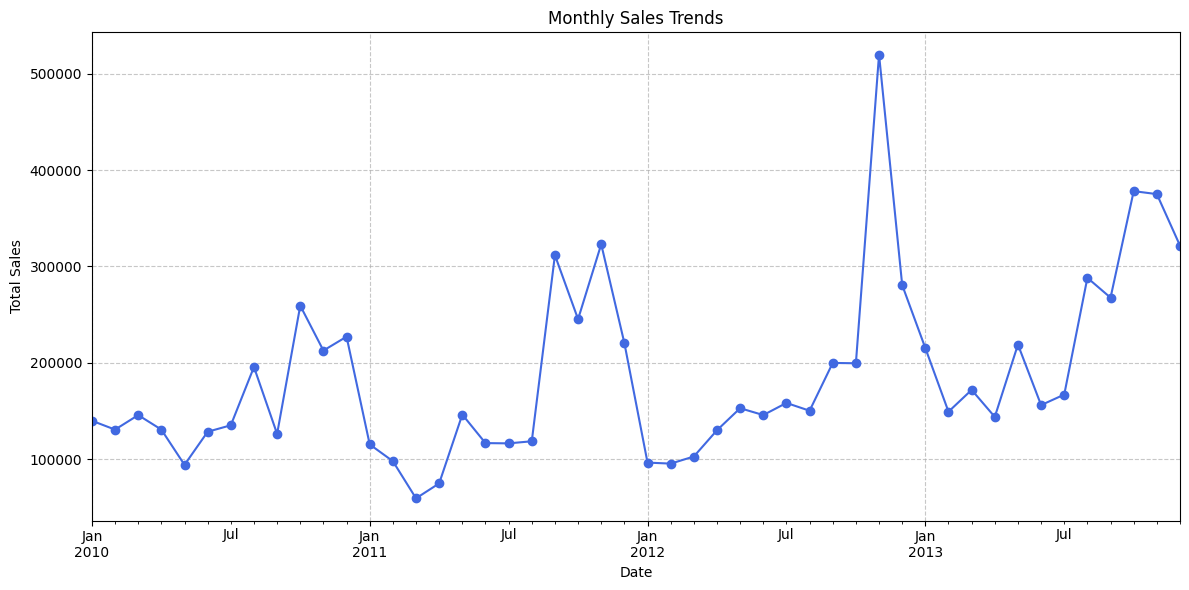

In [8]:

#Plotting -sales -trends --over -time________________________________

orders.columns = orders.columns.str.strip()

orders.columns = orders.columns.str.replace(' ', '_')



if 'Order_Date' in orders.columns:
    orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
else:
    raise ValueError("The 'Order_Date' column is not in the dataset.")


monthly_sales = orders.set_index('Order_Date')['Sales'].resample('M').sum()

# -Plotting -monthly -sales- trends________________________________________________
plt.figure(figsize=(12, 6))

monthly_sales.plot(kind='line', color='royalblue', marker='o')

plt.title('Monthly Sales Trends')

plt.xlabel('Date')

plt.ylabel('Total Sales')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()







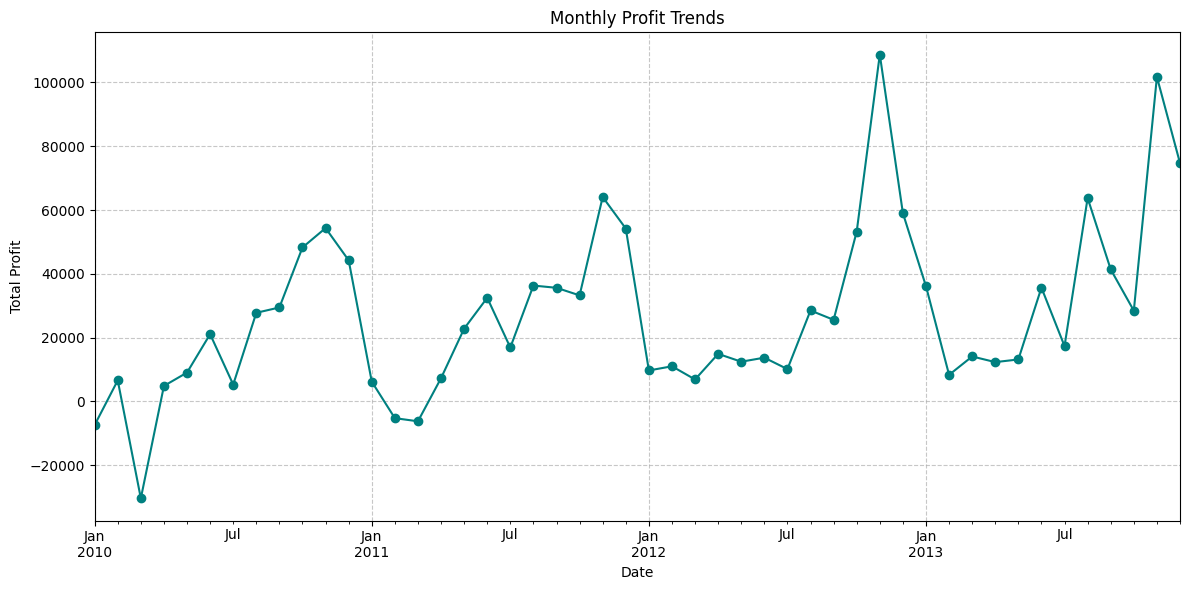

In [9]:
# -Plotting -profit -trends -over-time_______________________________________


orders.columns = orders.columns.str.strip()

orders.columns = orders.columns.str.replace(' ', '_')


# Ensure- 'Order_Date' -column is datetime -type___________________________________________
if 'Order_Date' in orders.columns:
    orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
else:
    raise ValueError("The 'Order_Date' column is not in the dataset.")

# -Plotting -profiT______________________
# -Resample- profiT_______________________
monthly_profit = orders.set_index('Order_Date')['Profit'].resample('M').sum()

# Plotting -monthly -profit- trendS_______________________________
plt.figure(figsize=(12, 6))

monthly_profit.plot(kind='line', color='teal', marker='o')

plt.title('Monthly Profit Trends')

plt.xlabel('Date')

plt.ylabel('Total Profit')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()




In [10]:


#Identifying  -top-performing- product -categories- based -on total- sales -and -profit___________________________

orders.columns = orders.columns.str.strip()
orders.columns = orders.columns.str.replace(' ', '_')

# names   to check
print("Column names in the dataset:")

print(orders.columns)



category_column = 'Category'

# Identify ________top-performing product______________________________
if category_column in orders.columns:
    category_sales_profit = orders.groupby(category_column)[['Sales', 'Profit']].sum()

    # Print-aggregated -sales -and -profit -data_______________________________
    print("\nTotal Sales and Profit by Product Category:")
    print(category_sales_profit)

 # Plotting   total   sales by   product category
    plt.figure(figsize=(12, 6))

    category_sales_profit['Sales'].sort_values().plot(kind='barh', color='skyblue')

    plt.title('Total Sales by Product Category')

    plt.xlabel('Total Sales')

    plt.ylabel('Product Category')

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.show()


# Plotting total profit by product  category_____________________________
    plt.figure(figsize=(12, 6))

    category_sales_profit['Profit'].sort_values().plot(kind='barh', color='lightgreen')

    plt.title('Total Profit by Product Category')

    plt.xlabel('Total Profit')

    plt.ylabel('Product Category')

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.show()
else:
    print(f"Column '{category_column}' not found in the dataset.")








Column names in the dataset:
Index(['Row_ID', 'Order_Priority', 'Discount', 'Unit_Price', 'Shipping_Cost',
       'Customer_ID', 'Customer_Name', 'Ship_Mode', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Container',
       'Product_Name', 'Product_Base_Margin', 'Region', 'State_or_Province',
       'City', 'Postal_Code', 'Order_Date', 'Ship_Date', 'Profit',
       'Quantity_ordered_new', 'Sales', 'Order_ID', 'Processing_Time', 'Month',
       'Year'],
      dtype='object')
Column 'Category' not found in the dataset.


In [11]:

# Generating       -summary -statistics- for -each -region____________________________________
region_summary = orders.groupby('Region').describe()

print("Summary statistics for each region:")

print(region_summary)





# Display -summary -statistics____________________________________
print("Summary Statistics for the Dataset:")

summary_statistics = orders.describe()

print(summary_statistics)






Summary statistics for each region:
         Row_ID                                                            \
          count          mean    min       25%      50%      75%      max   
Region                                                                      
Central  2899.0  21009.057261   52.0  19692.50  21825.0  24161.5  26387.0   
East     2289.0  19120.730887    2.0  18709.00  21421.0  23779.0  26389.0   
South    1954.0  21172.882805  257.0  19770.75  21986.5  24323.0  26399.0   
West     2284.0  19591.675569   64.0  18973.00  21346.0  23897.5  26397.0   

                     Discount            ... Month              Year  \
                 std    count      mean  ...   max       std   count   
Region                                   ...                           
Central  5031.383479   2899.0  0.049348  ...  12.0  3.454635  2899.0   
East     7195.690558   2289.0  0.050000  ...  12.0  3.466239  2289.0   
South    4947.572889   1954.0  0.049401  ...  12.0  3.489545  19

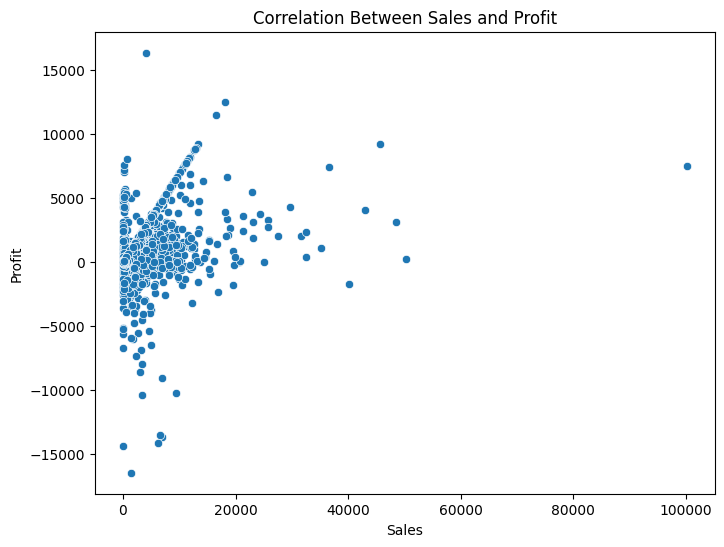

Correlation Coefficient between Sales and Profit: 0.37158306977184086


In [12]:
# --Visualizing --the --correlation --between-- sales-- and --profit-_______________________
plt.figure(figsize=(8, 6))

sns.scatterplot(x=orders['Sales'], y=orders['Profit'])

plt.title('Correlation Between Sales and Profit')

plt.xlabel('Sales')

plt.ylabel('Profit')

plt.show()


#-- Displaying-- the --correlation --coefficient___________________________________
correlation_coefficient = orders['Sales'].corr(orders['Profit'])

print(f"Correlation Coefficient between Sales and Profit: {correlation_coefficient}")






Columns in the dataset:
Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

First few rows of the dataset:
   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Cu

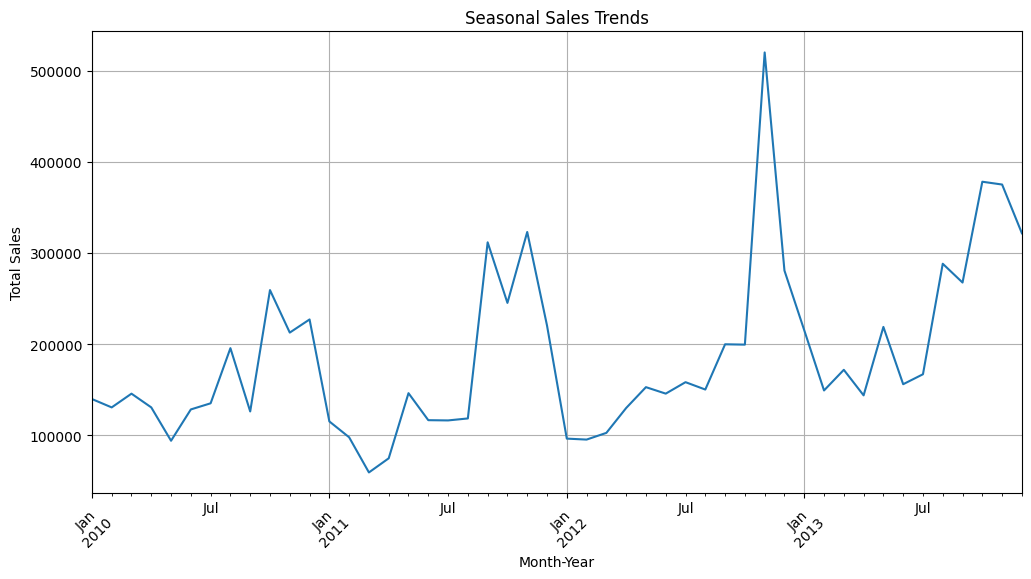

In [13]:


# Analyzing --seasonal --sales --trends--__________________________________________
orders = pd.read_excel(file_path, sheet_name='Orders')


# --verify --the -correct- column- names--____________________________________
print("Columns in the dataset:")

print(orders.columns)


# --few -rows -to check- column names -and- data-___________________________________
print("\nFirst few rows of the dataset:")

print(orders.head())




# Grouping --sales-- data-- by-- month-- and --year___________________________________
orders['Month-Year'] = orders['Order Date'].dt.to_period('M')

monthly_sales = orders.groupby('Month-Year')['Sales'].sum()


print("Sales grouped by Month and Year:")

print(monthly_sales)








# Plotting --seasonal-- sales --trends_______________________________________
plt.figure(figsize=(12, 6))

monthly_sales.plot()

plt.title('Seasonal Sales Trends')

plt.xlabel('Month-Year')

plt.ylabel('Total Sales')

plt.xticks(rotation=45)

plt.grid(True)

plt.show()











Cleaned column names:
Index(['Row_ID', 'Order_Priority', 'Discount', 'Unit_Price', 'Shipping_Cost',
       'Customer_ID', 'Customer_Name', 'Ship_Mode', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Container',
       'Product_Name', 'Product_Base_Margin', 'Region', 'State_or_Province',
       'City', 'Postal_Code', 'Order_Date', 'Ship_Date', 'Profit',
       'Quantity_ordered_new', 'Sales', 'Order_ID', 'Month-Year'],
      dtype='object')

Sales by Ship Mode:
Ship_Mode
Delivery Truck    3706516.02
Express Air        701756.34
Regular Air       4543658.96
Name: Sales, dtype: float64


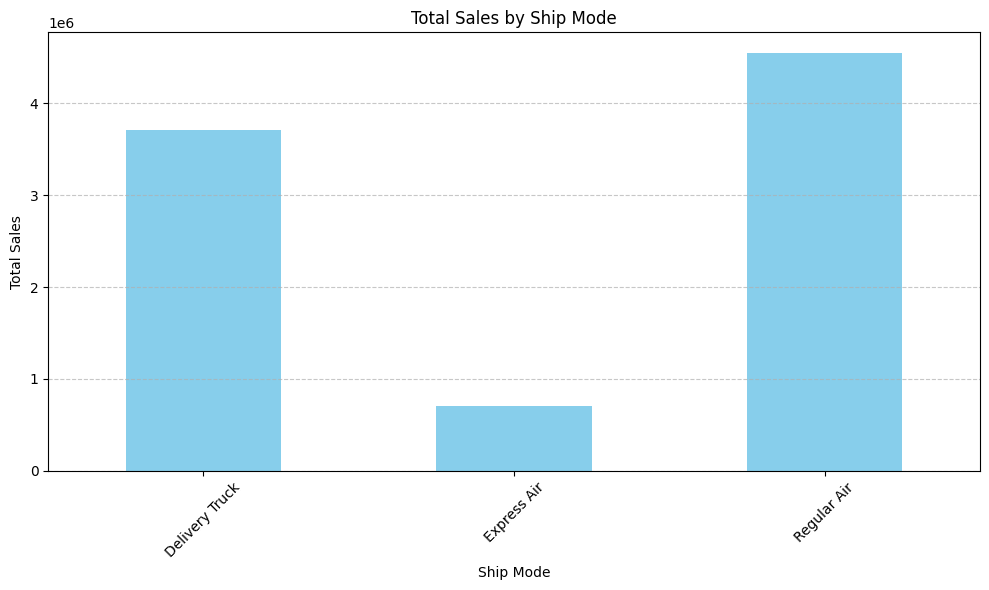

In [14]:


# Comparing --sales -across -different -ship- modes-_____________________________________________
orders.columns = orders.columns.str.strip()
orders.columns = orders.columns.str.replace(' ', '_')

#column --names to verify____________________________________________

print("Cleaned column names:")

print(orders.columns)




sales_by_ship_mode = orders.groupby('Ship_Mode')['Sales'].sum()


print("\nSales by Ship Mode:")

print(sales_by_ship_mode)


# Plotting sales comparison____________________________________________
plt.figure(figsize=(10, 6))

sales_by_ship_mode.plot(kind='bar', color='skyblue')

plt.title('Total Sales by Ship Mode')

plt.xlabel('Ship Mode')

plt.ylabel('Total Sales')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()




In [15]:

#--Ensure- column- names --are --clean______________________________________________

orders.columns = orders.columns.str.strip()

orders.columns = orders.columns.str.replace(' ', '_')


# --Print --column -names- to- verify-_____________________________________________________
print("Cleaned column names:")

print(orders.columns)

# -Ensure -'Ship Date'- column -is -datetime- type-____________________________________________
# Convert 'Ship Date' to datetime (adjust column name if needed)______________________________________________
if 'Ship_Date' in orders.columns:
    orders['Ship_Date'] = pd.to_datetime(orders['Ship_Date'])
else:
    raise ValueError("The 'Ship Date' column is not in the dataset.")

# Verify --the --conversion--_____________________________________________
print("Data types of the columns:")

print(orders.dtypes)

# Dropping --rows --where 'Ship Date' --couldn't be -converted-_____________________________________
orders.dropna(subset=['Ship_Date'], inplace=True)


# Resample- sales --data -by -month-_________________________________________

monthly_sales = orders.resample('M', on='Ship_Date')['Sales'].sum()











Cleaned column names:
Index(['Row_ID', 'Order_Priority', 'Discount', 'Unit_Price', 'Shipping_Cost',
       'Customer_ID', 'Customer_Name', 'Ship_Mode', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Container',
       'Product_Name', 'Product_Base_Margin', 'Region', 'State_or_Province',
       'City', 'Postal_Code', 'Order_Date', 'Ship_Date', 'Profit',
       'Quantity_ordered_new', 'Sales', 'Order_ID', 'Month-Year'],
      dtype='object')
Data types of the columns:
Row_ID                           int64
Order_Priority                  object
Discount                       float64
Unit_Price                     float64
Shipping_Cost                  float64
Customer_ID                      int64
Customer_Name                   object
Ship_Mode                       object
Customer_Segment                object
Product_Category                object
Product_Sub-Category            object
Product_Container               object
Product_Name                